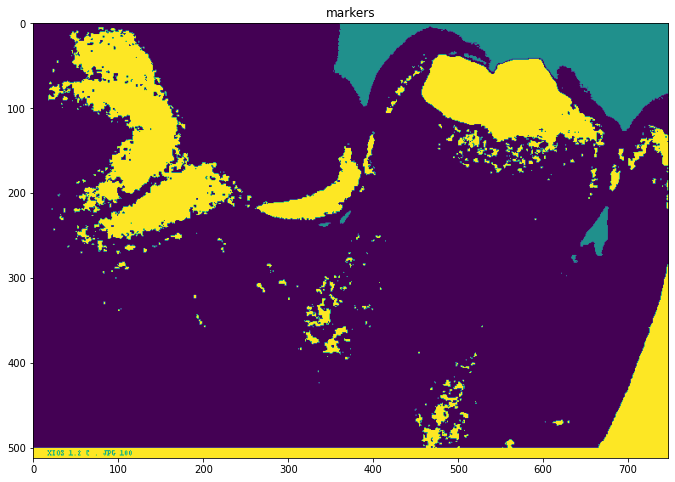

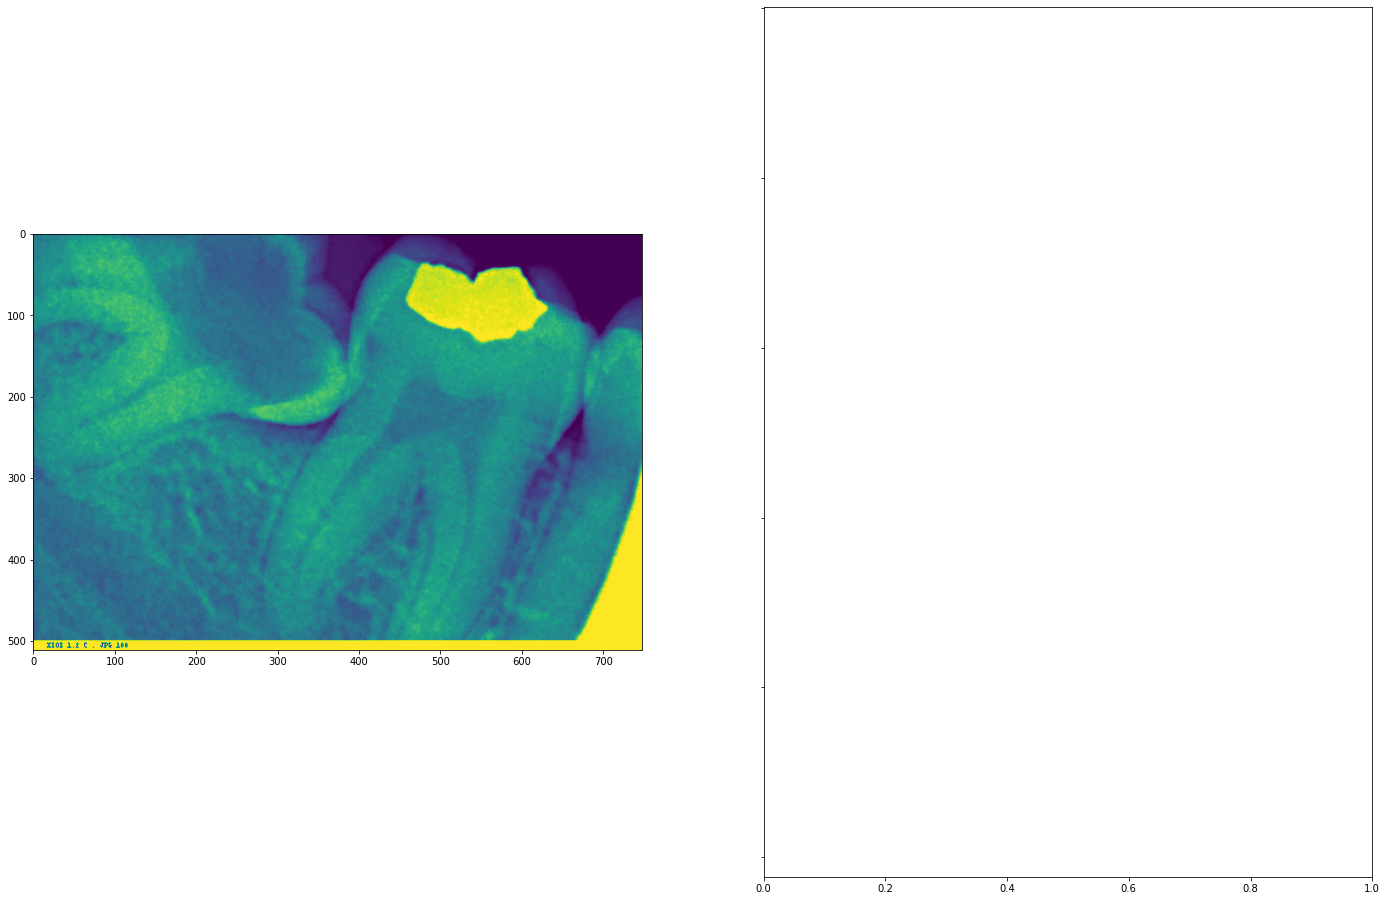

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import canny
import cv2
from skimage.color import rgb2gray
import scipy.ndimage as nd
plt.rcParams["figure.figsize"] = (12,8)


teeth = cv2.imread("30.jpg")
teeth_wh = rgb2gray(teeth)
 
# apply edge segmentation
# plot canny edge detection
edges = canny(teeth_wh)
 
# fill regions to perform edge segmentation
fill_im = nd.binary_fill_holes(edges)
plt.imshow(fill_im)
plt.title('Region Filling')
 
# Since, the constrast difference is not much. Anyways we will perform it
markers = np.zeros_like(teeth_wh)
markers[teeth_wh < 0.1171875] = 1 # 30/255
markers[teeth_wh > 0.5859375] = 2 # 150/255
 
plt.imshow(markers)
plt.title('markers')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 16), sharey=True)
ax1.imshow(teeth_wh)

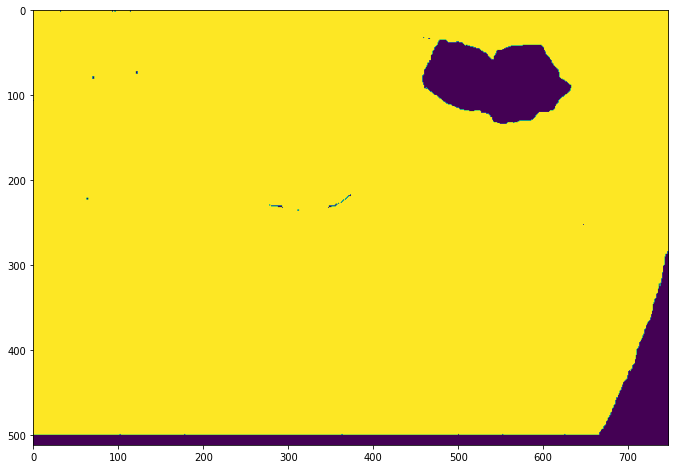

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

class Point(object):
 def __init__(self,x,y):
  self.x = x
  self.y = y

 def getX(self):
  return self.x
 def getY(self):
  return self.y

def getGrayDiff(img,currentPoint,tmpPoint):
 return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))

def selectConnects(p):
 if p != 0:
  connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1), \
     Point(0, 1), Point(-1, 1), Point(-1, 0)]
 else:
  connects = [ Point(0, -1), Point(1, 0),Point(0, 1), Point(-1, 0)]
 return connects

def regionGrow(img,seeds,thresh,p = 1):
 height, weight = img.shape
 seedMark = np.zeros(img.shape)
 seedList = []
 for seed in seeds:
  seedList.append(seed)
 label = 1
 connects = selectConnects(p)
 while(len(seedList)>0):
  currentPoint = seedList.pop(0)

  seedMark[currentPoint.x,currentPoint.y] = label
  for i in range(8):
   tmpX = currentPoint.x + connects[i].x
   tmpY = currentPoint.y + connects[i].y
   if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
    continue
   grayDiff = getGrayDiff(img,currentPoint,Point(tmpX,tmpY))
   if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
    seedMark[tmpX,tmpY] = label
    seedList.append(Point(tmpX,tmpY))
 return seedMark


img = cv2.imread('30.jpg', 0)
seeds = [Point(10,10),Point(82,150),Point(20,300)]
binaryImg = regionGrow(img,seeds,10)
plt.imshow(binaryImg)